In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [2]:
data=pd.read_csv('credit.csv')
data.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [3]:
data.tail()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
995,unknown,12,good,furniture/appliances,1736,< 100 DM,4 - 7 years,3,4,31,none,own,1,unskilled,1,no,no
996,< 0 DM,30,good,car,3857,< 100 DM,1 - 4 years,4,4,40,none,own,1,management,1,yes,no
997,unknown,12,good,furniture/appliances,804,< 100 DM,> 7 years,4,4,38,none,own,1,skilled,1,no,no
998,< 0 DM,45,good,furniture/appliances,1845,< 100 DM,1 - 4 years,4,4,23,none,other,1,skilled,1,yes,yes
999,1 - 200 DM,45,critical,car,4576,100 - 500 DM,unemployed,3,4,27,none,own,1,skilled,1,no,no


In [4]:
data.sample(10)

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
308,1 - 200 DM,8,good,furniture/appliances,1237,< 100 DM,1 - 4 years,3,4,24,none,own,1,skilled,1,no,yes
328,> 200 DM,36,good,furniture/appliances,4473,< 100 DM,> 7 years,4,2,31,none,own,1,skilled,1,no,no
985,< 0 DM,15,critical,furniture/appliances,1433,< 100 DM,1 - 4 years,4,3,25,none,rent,2,skilled,1,no,no
661,< 0 DM,12,good,car,900,unknown,1 - 4 years,4,2,23,none,own,1,skilled,1,no,yes
123,> 200 DM,10,critical,car,781,< 100 DM,> 7 years,4,4,63,none,other,2,skilled,1,yes,no
198,1 - 200 DM,24,good,car,2760,unknown,> 7 years,4,4,36,bank,other,1,skilled,1,yes,no
544,unknown,12,critical,car,1255,< 100 DM,> 7 years,4,4,61,none,own,2,unskilled,1,no,no
999,1 - 200 DM,45,critical,car,4576,100 - 500 DM,unemployed,3,4,27,none,own,1,skilled,1,no,no
718,> 200 DM,24,critical,furniture/appliances,3148,unknown,1 - 4 years,3,2,31,none,own,2,skilled,1,yes,no
417,< 0 DM,18,poor,education,8471,unknown,1 - 4 years,1,2,23,none,rent,2,skilled,1,yes,no


In [5]:
data.shape

(1000, 17)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

In [7]:
err_val=data.select_dtypes(include='object').columns

In [8]:
for i in err_val:
    data[err_val]=data[err_val].astype('category')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   checking_balance      1000 non-null   category
 1   months_loan_duration  1000 non-null   int64   
 2   credit_history        1000 non-null   category
 3   purpose               1000 non-null   category
 4   amount                1000 non-null   int64   
 5   savings_balance       1000 non-null   category
 6   employment_duration   1000 non-null   category
 7   percent_of_income     1000 non-null   int64   
 8   years_at_residence    1000 non-null   int64   
 9   age                   1000 non-null   int64   
 10  other_credit          1000 non-null   category
 11  housing               1000 non-null   category
 12  existing_loans_count  1000 non-null   int64   
 13  job                   1000 non-null   category
 14  dependents            1000 non-null   int64   
 15  phone

In [10]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
checking_balance,1000,4,unknown,394,NaN,NaN,NaN,NaN,NaN,NaN,NaN
months_loan_duration,1000.0,NaN,NaN,NaN,20.903,12.058814,4.0,12.0,18.0,24.0,72.0
credit_history,1000,5,good,530,NaN,NaN,NaN,NaN,NaN,NaN,NaN
purpose,1000,6,furniture/appliances,473,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amount,1000.0,NaN,NaN,NaN,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
savings_balance,1000,5,< 100 DM,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN
employment_duration,1000,5,1 - 4 years,339,NaN,NaN,NaN,NaN,NaN,NaN,NaN
percent_of_income,1000.0,NaN,NaN,NaN,2.973,1.118715,1.0,2.0,3.0,4.0,4.0
years_at_residence,1000.0,NaN,NaN,NaN,2.845,1.103718,1.0,2.0,3.0,4.0,4.0
age,1000.0,NaN,NaN,NaN,35.546,11.375469,19.0,27.0,33.0,42.0,75.0


In [11]:
data.isna().sum()

checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_duration     0
percent_of_income       0
years_at_residence      0
age                     0
other_credit            0
housing                 0
existing_loans_count    0
job                     0
dependents              0
phone                   0
default                 0
dtype: int64

<Figure size 576x576 with 0 Axes>

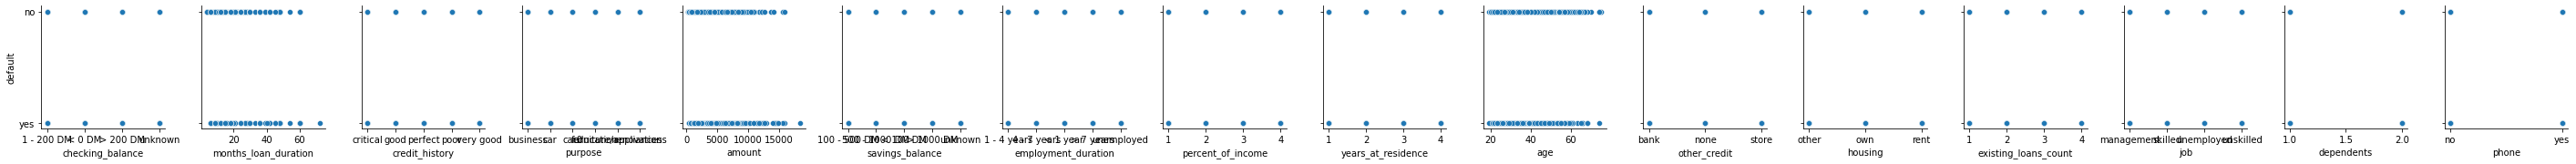

In [12]:
plt.figure(figsize=(8,8))
sns.pairplot(data=data,y_vars=['default'],x_vars=data.iloc[:,:-1])

In [13]:
data.corr().style.background_gradient('magma')

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents
months_loan_duration,1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834
amount,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142
percent_of_income,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,-0.071207
years_at_residence,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643
age,-0.036136,0.032716,0.058266,0.266419,1.000000,0.149254,0.118201
existing_loans_count,-0.011284,0.020795,0.021669,0.089625,0.149254,1.000000,0.109667
dependents,-0.023834,0.017142,-0.071207,0.042643,0.118201,0.109667,1.000000


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   checking_balance      1000 non-null   category
 1   months_loan_duration  1000 non-null   int64   
 2   credit_history        1000 non-null   category
 3   purpose               1000 non-null   category
 4   amount                1000 non-null   int64   
 5   savings_balance       1000 non-null   category
 6   employment_duration   1000 non-null   category
 7   percent_of_income     1000 non-null   int64   
 8   years_at_residence    1000 non-null   int64   
 9   age                   1000 non-null   int64   
 10  other_credit          1000 non-null   category
 11  housing               1000 non-null   category
 12  existing_loans_count  1000 non-null   int64   
 13  job                   1000 non-null   category
 14  dependents            1000 non-null   int64   
 15  phone

In [15]:
num_val=data.select_dtypes(include='int64')

In [16]:
len(data.columns)

17

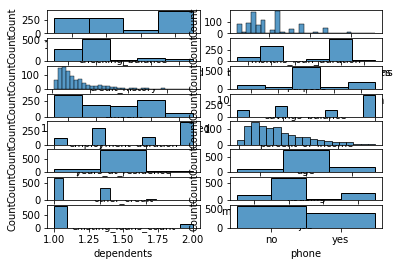

In [17]:
for i,j in enumerate(data.iloc[:,:-1]):
    plt.subplot(8,2,i+1)
    sns.histplot(data[j])

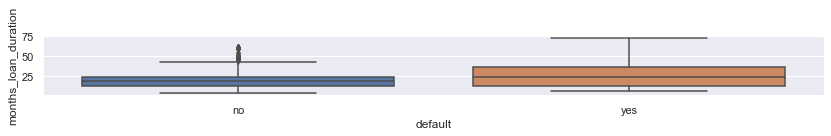

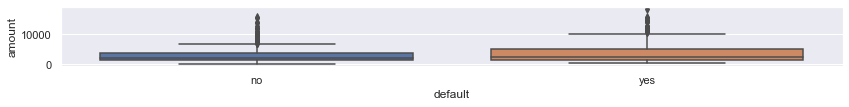

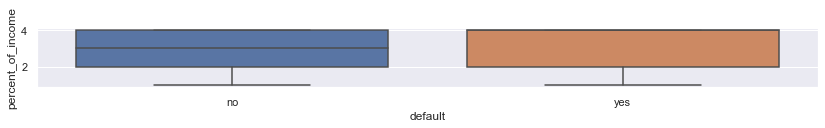

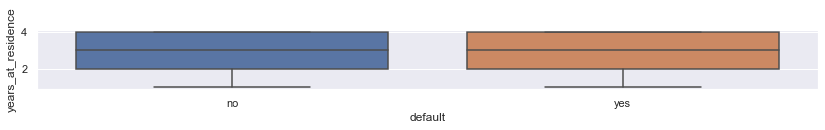

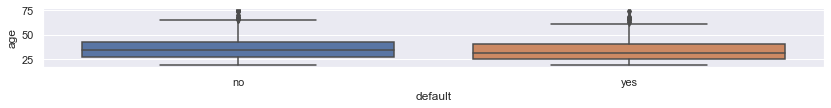

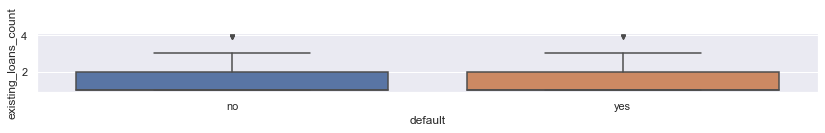

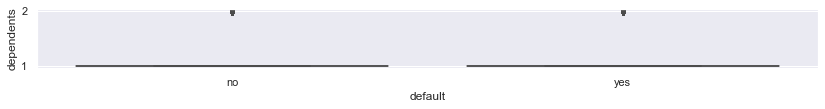

In [18]:
import warnings 
warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize':(14,9)})
for i , var in enumerate(num_val.columns):
    plt.subplot(7,1,i+1)
    sns.boxplot(data['default'],data[var])
    plt.show()

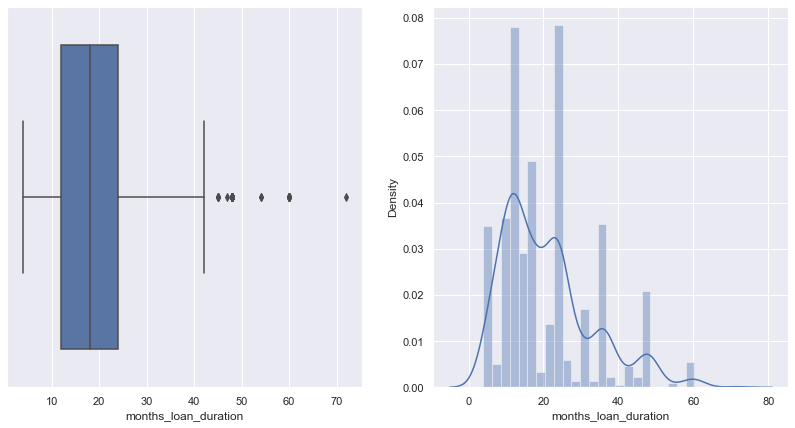

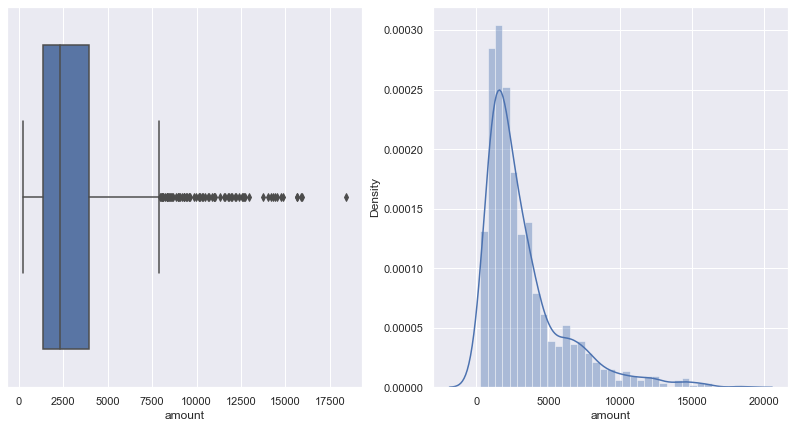

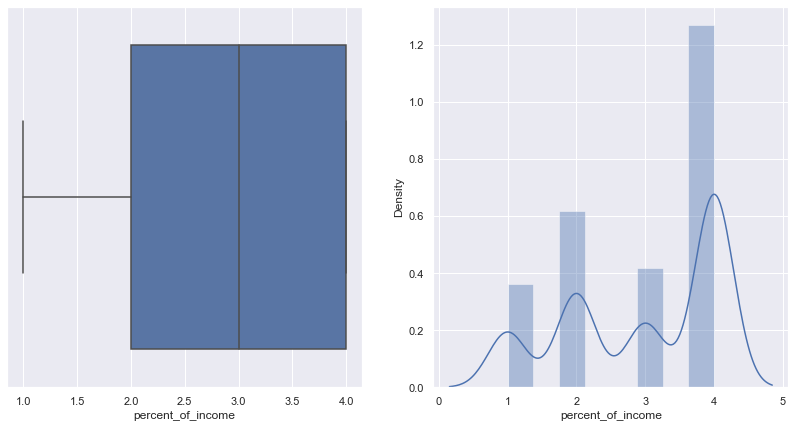

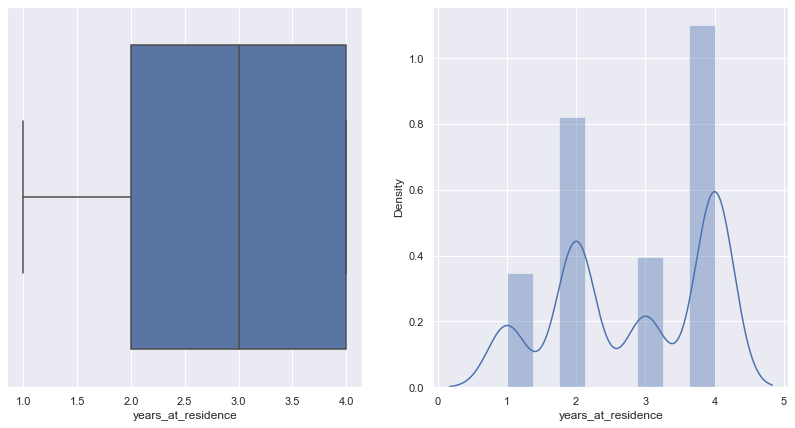

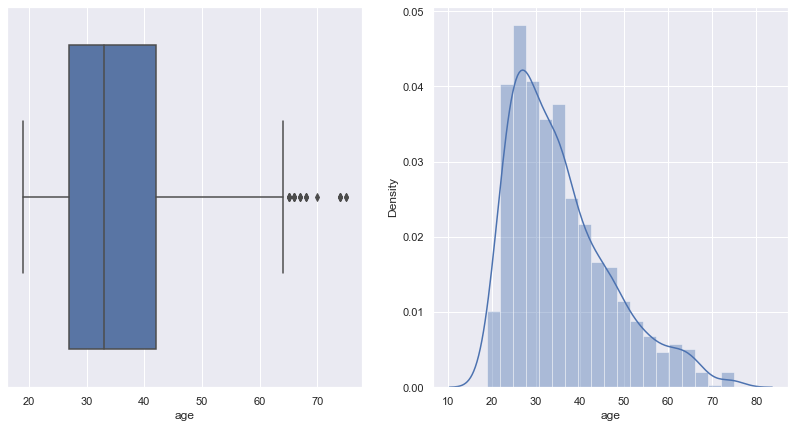

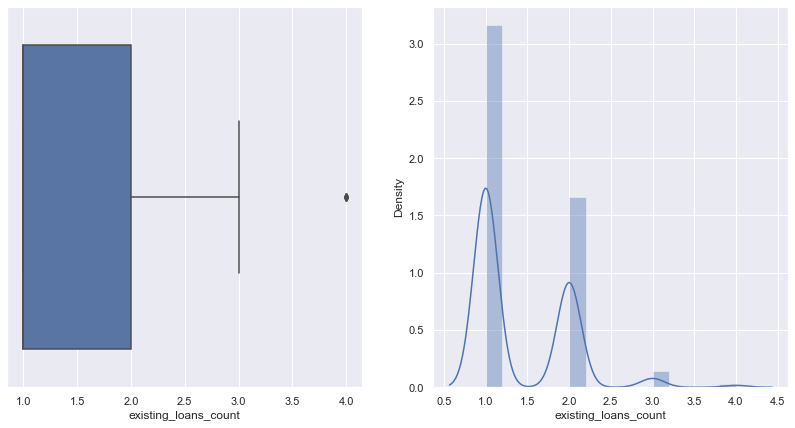

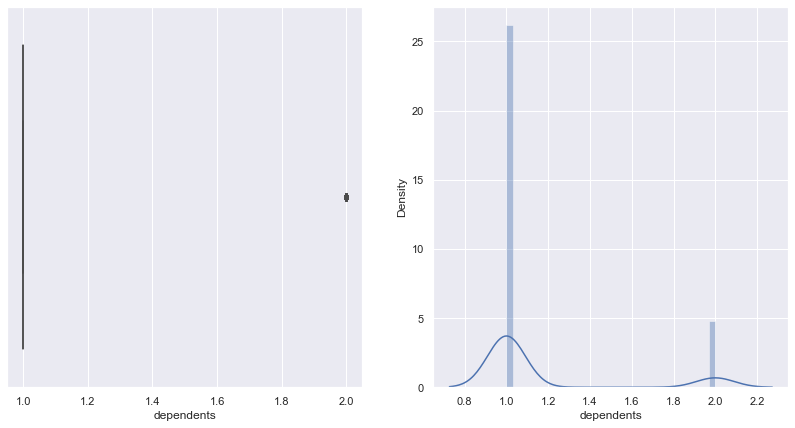

In [19]:
for i, var in enumerate(num_val.columns):
    fig,ax=plt.subplots(1,2,figsize=(14,7))
    sns.boxplot(data[var],ax=ax[0])
    sns.distplot(data[var],ax=ax[1])
    plt.show()

<AxesSubplot:>

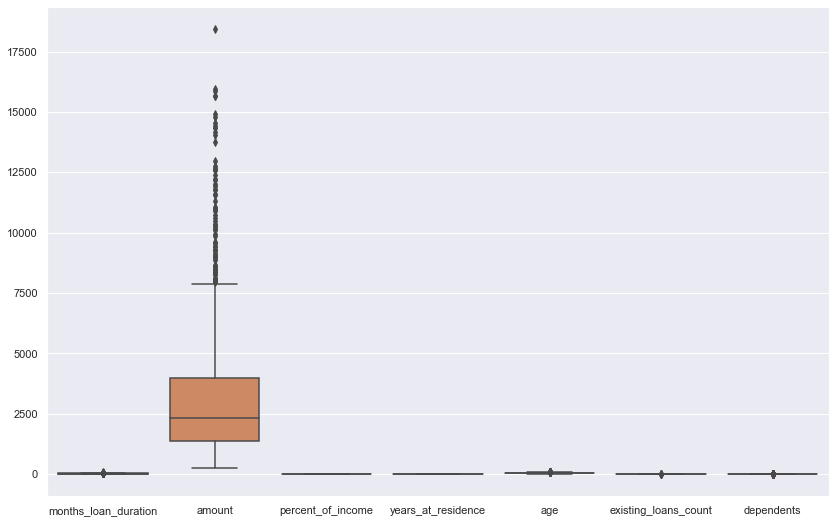

In [20]:
sns.boxplot(data=data.iloc[:,:-1])

<AxesSubplot:xlabel='default', ylabel='count'>

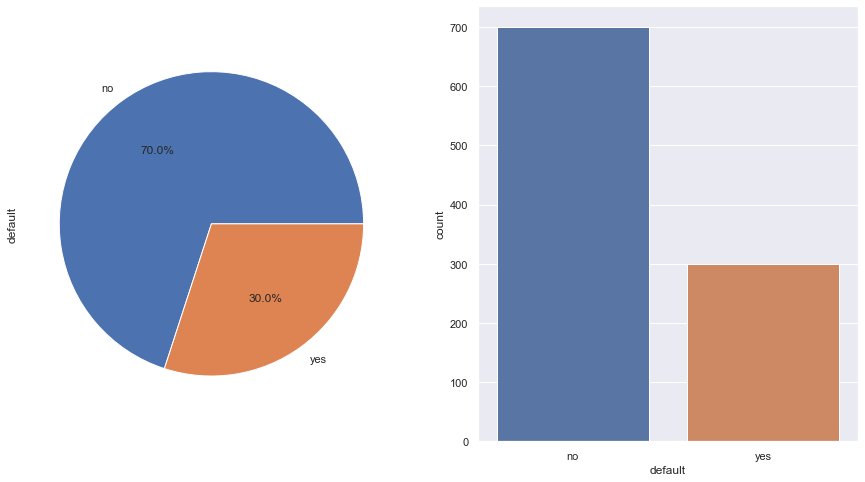

In [21]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,8))
data['default'].value_counts().plot(kind="pie",autopct='%1.1f%%',ax=ax1)
sns.countplot(data['default'],ax=ax2)

In [22]:
cat_val=data.select_dtypes(include="category")

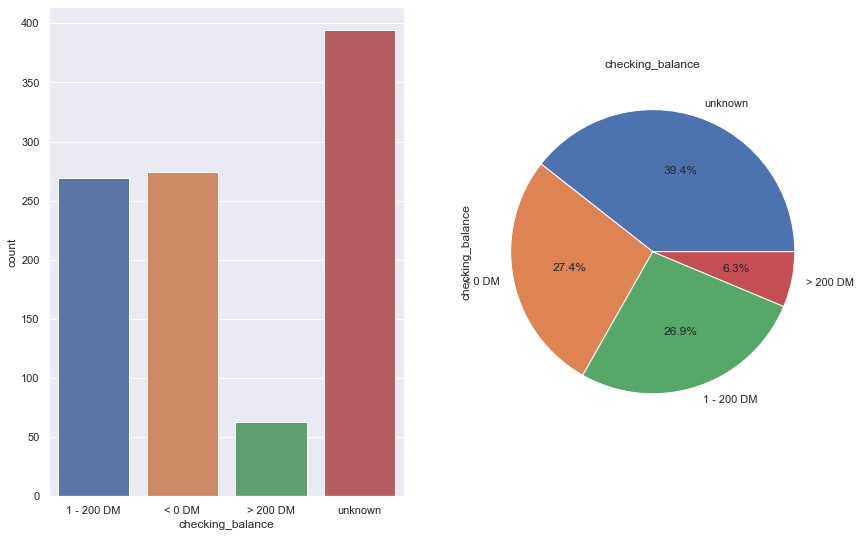

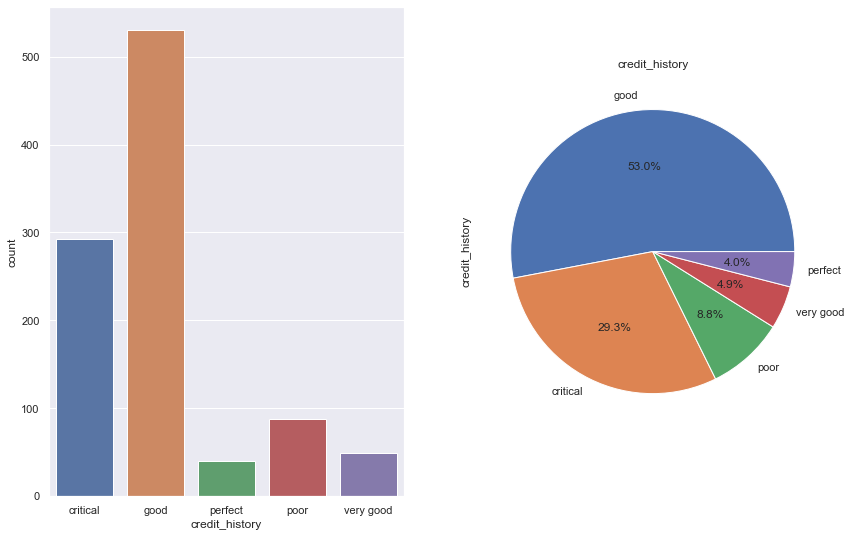

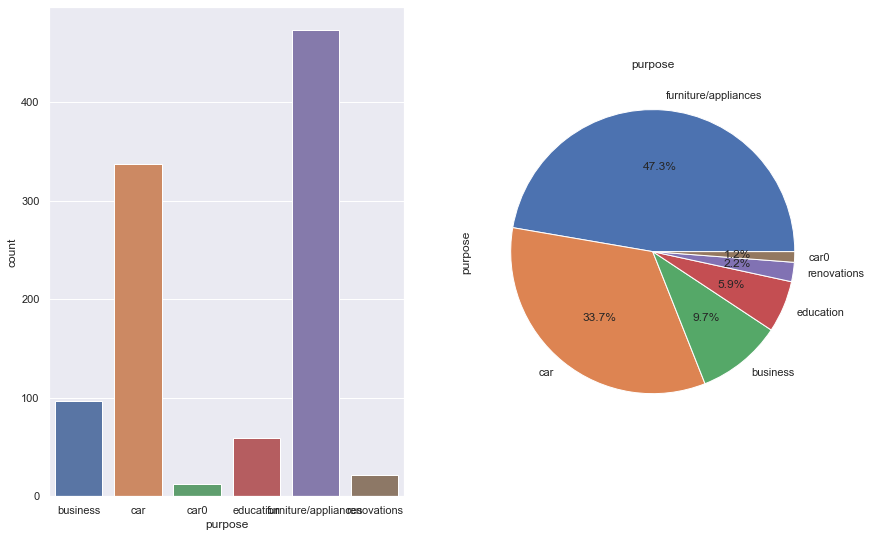

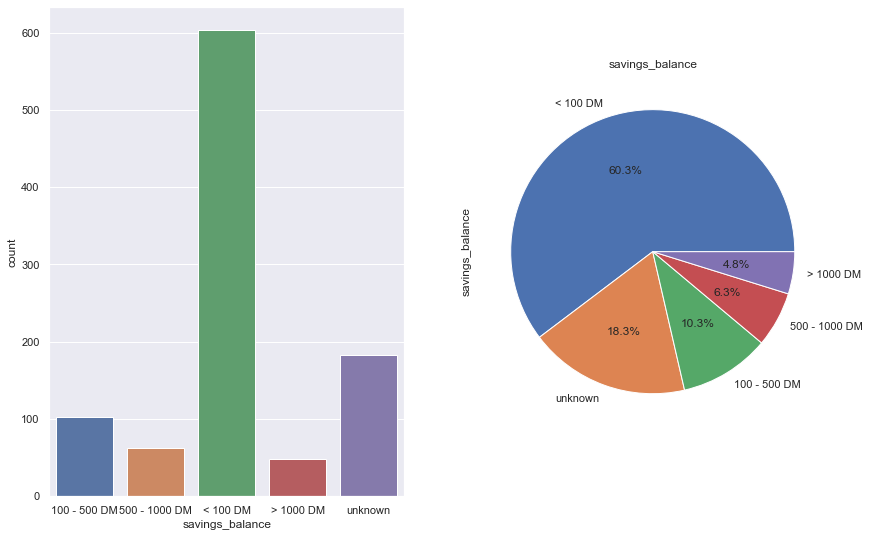

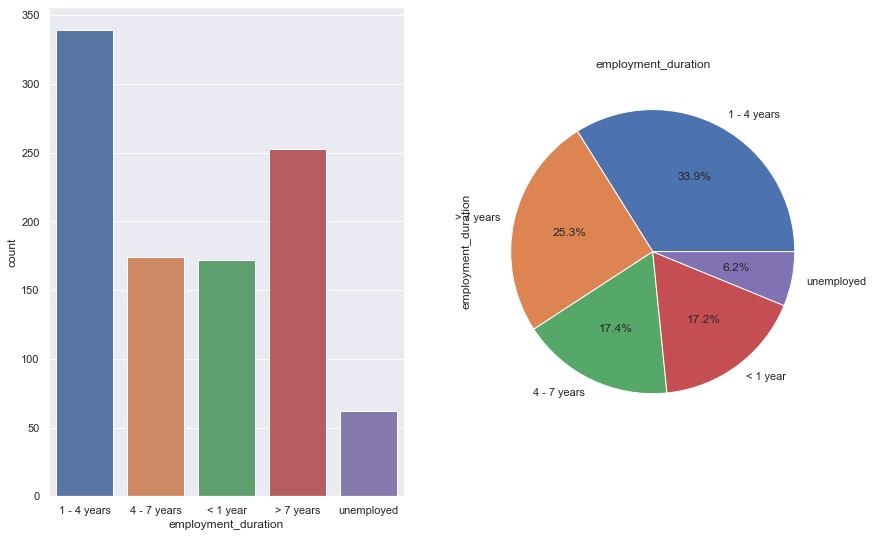

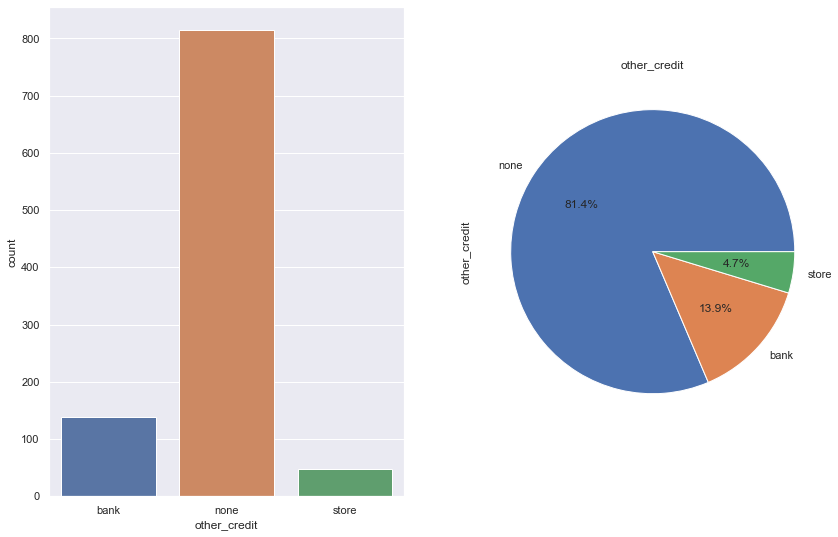

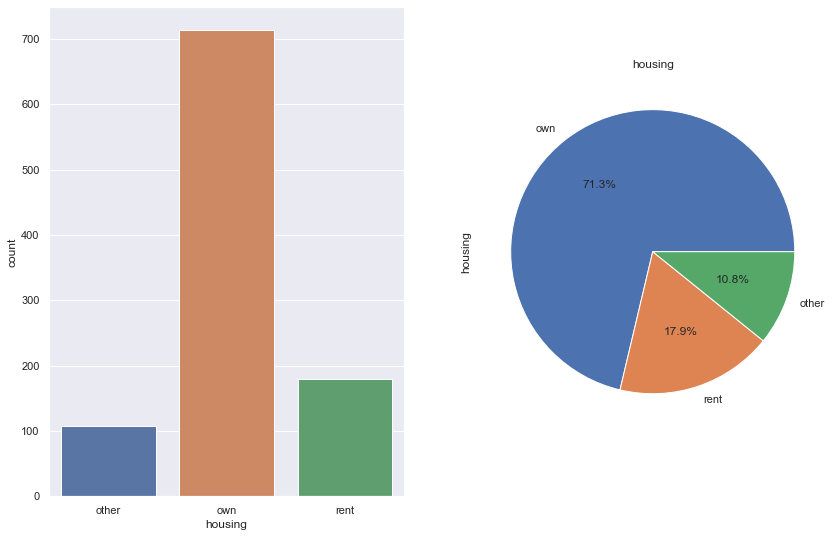

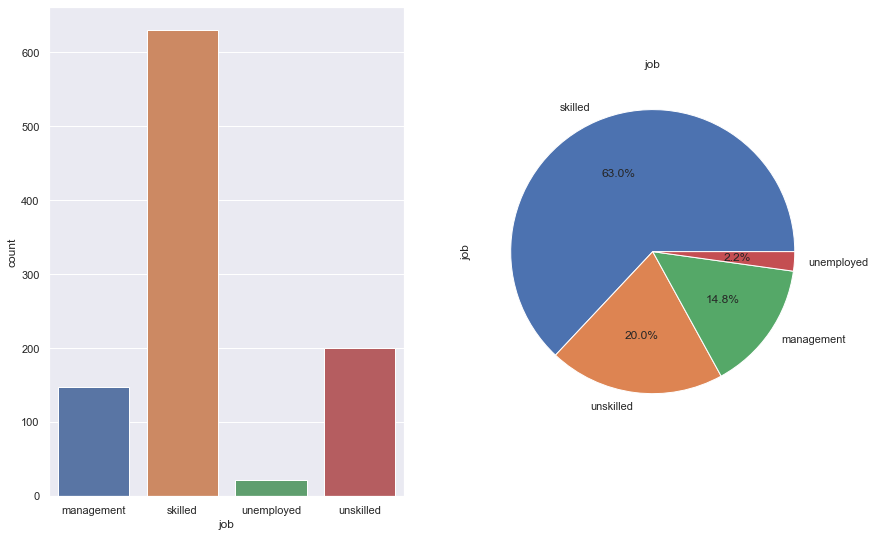

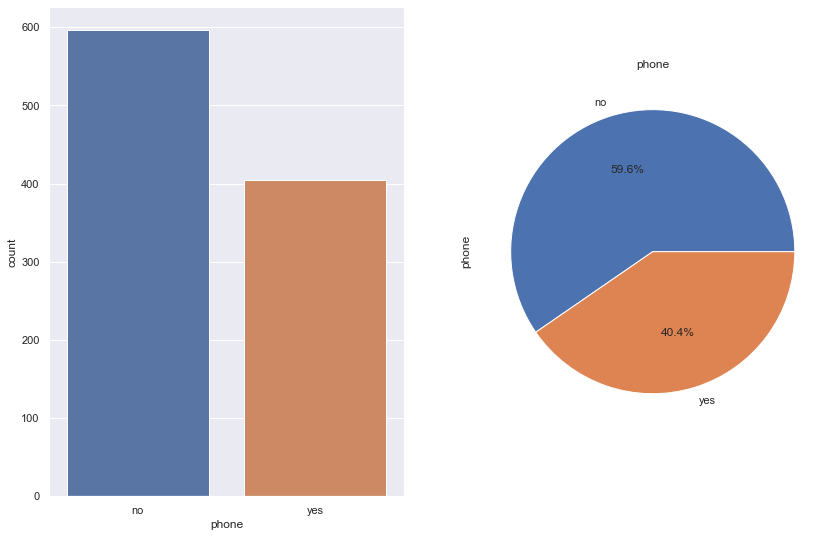

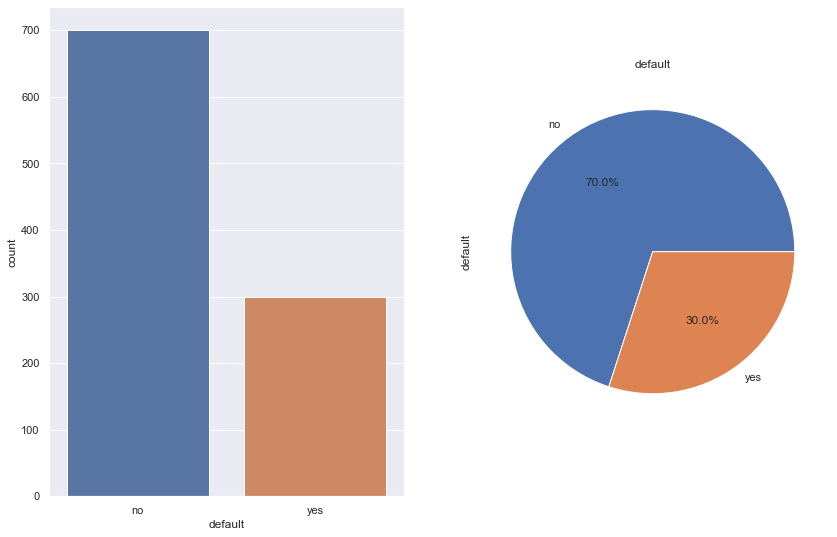

In [23]:
for i, var in enumerate(cat_val.columns):
    fig,ax=plt.subplots(1,2,figsize=(14,9))
    sns.countplot(data[var],ax=ax[0])
    data[var].value_counts().plot(kind='pie',autopct='%1.1f%%',ax=ax[1])
    plt.title(var)
    plt.show()

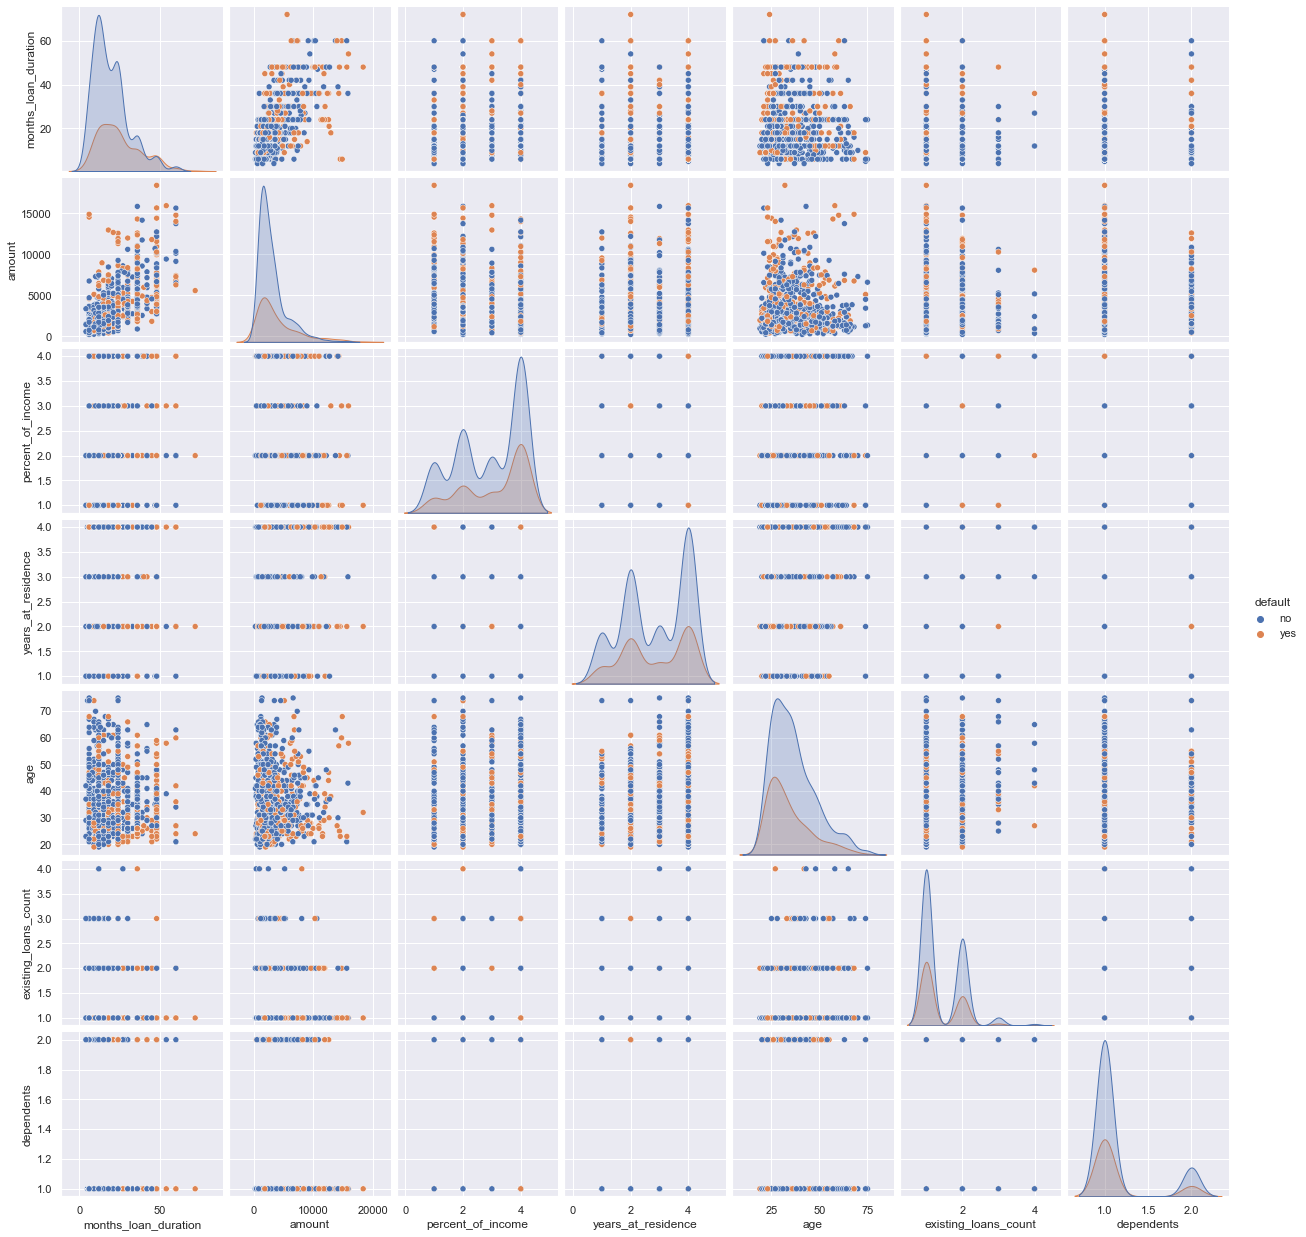

In [24]:
sns.pairplot(data,hue='default')

In [25]:
from statsmodels.stats.weightstats import ztest
from scipy.stats import ttest_ind,chi2_contingency

In [26]:
for  i in data.columns:
    print(i)
    print('')
    print(data[i].value_counts())
    print('')

checking_balance

unknown       394
< 0 DM        274
1 - 200 DM    269
> 200 DM       63
Name: checking_balance, dtype: int64

months_loan_duration

24    184
12    179
18    113
36     83
6      75
15     64
9      49
48     48
30     40
21     30
10     28
27     13
60     13
42     11
11      9
20      8
8       7
4       6
7       5
39      5
45      5
14      4
13      4
28      3
33      3
54      2
22      2
16      2
40      1
47      1
26      1
5       1
72      1
Name: months_loan_duration, dtype: int64

credit_history

good         530
critical     293
poor          88
very good     49
perfect       40
Name: credit_history, dtype: int64

purpose

furniture/appliances    473
car                     337
business                 97
education                59
renovations              22
car0                     12
Name: purpose, dtype: int64

amount

1258    3
1262    3
1393    3
1478    3
1275    3
       ..
759     1
760     1
763     1
2812    1
6143    1
Name: amount, Len

In [27]:
label=["checking_balance","credit_history","savings_balance","employment_duration","phone","default"]
oneHotCols=["purpose","housing","other_credit","job"]

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
labels=LabelEncoder()

In [30]:
for i in label:
    data[i]=labels.fit_transform(data[i])

In [33]:
data=pd.get_dummies(data,columns=oneHotCols,drop_first=True)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   checking_balance              1000 non-null   int32
 1   months_loan_duration          1000 non-null   int64
 2   credit_history                1000 non-null   int32
 3   amount                        1000 non-null   int64
 4   savings_balance               1000 non-null   int32
 5   employment_duration           1000 non-null   int32
 6   percent_of_income             1000 non-null   int64
 7   years_at_residence            1000 non-null   int64
 8   age                           1000 non-null   int64
 9   existing_loans_count          1000 non-null   int64
 10  dependents                    1000 non-null   int64
 11  phone                         1000 non-null   int32
 12  default                       1000 non-null   int32
 13  purpose_car                   1000

In [47]:
from sklearn.feature_selection import chi2,SelectKBest

In [48]:
y=data[['default']]
x=data.iloc[:,:-1]

In [51]:
feature=SelectKBest(chi2,k='all')
score=feature.fit(x,y)
df=pd.DataFrame()
df=pd.DataFrame(score.scores_,index=x.columns)

In [57]:
main_val=df.sort_values(0,ascending=False).head(19).index

In [59]:
data=data[main_val]

In [62]:
y=data[['default']]
x=data.drop('default',1)

In [65]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [66]:
dcf=DecisionTreeClassifier()
dcf.fit(x_train,y_train)
print('trian score',dcf.score(x_train,y_train))
print("test score ",dcf.score(x_test,y_test))

trian score 1.0
test score  0.68


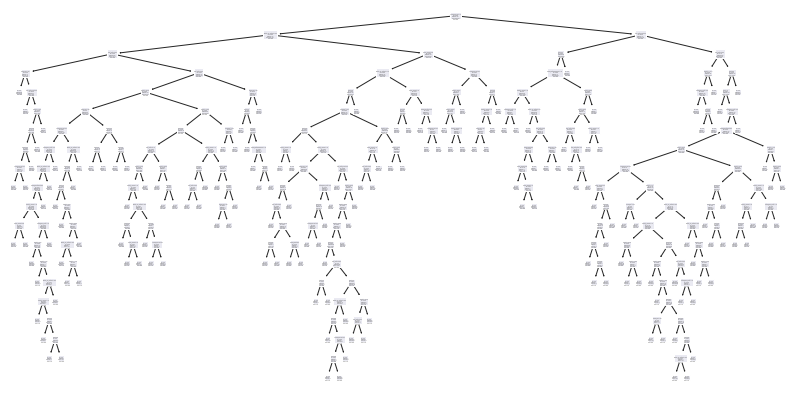

In [68]:
from sklearn.tree import plot_tree
features=list(x_train)
target=["NO","Yes"]
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(14,7))
plot_tree(dcf,feature_names=features,class_names=target)
fig.savefig('tree.png')

In [75]:
dcf1=DecisionTreeClassifier(criterion = 'gini', max_depth = 4)
dcf1.fit(x_train,y_train)
print("Train ",dcf1.score(x_train,y_train))
print("Test ",dcf1.score(x_test,y_test))

Train  0.7671428571428571
Test  0.7533333333333333


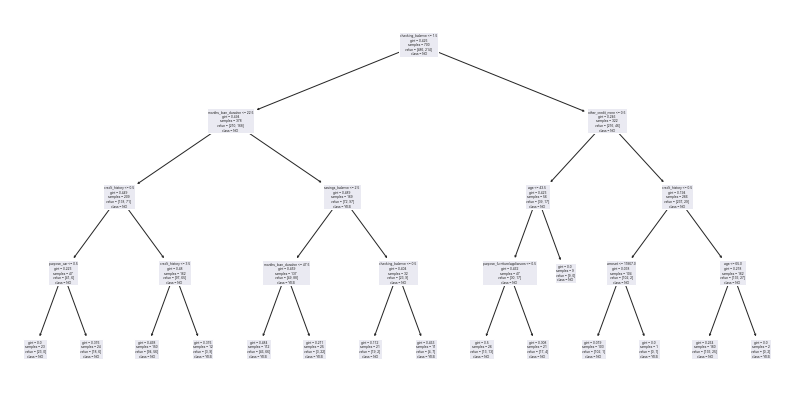

In [82]:
feature=list(x_train)
target=['NO','YES']
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(14,7))
plot_tree(dcf1,feature_names=feature,class_names=target)
fig.savefig("jones2.png")

In [84]:
print(pd.DataFrame(dcf1.feature_importances_,columns=["IMP"],index=x_train.columns))

                                   IMP
amount                        0.023800
months_loan_duration          0.167971
checking_balance              0.439334
credit_history                0.139179
age                           0.058674
housing_rent                  0.000000
savings_balance               0.082879
housing_own                   0.000000
purpose_furniture/appliances  0.027272
other_credit_store            0.000000
other_credit_none             0.042905
purpose_education             0.000000
percent_of_income             0.000000
phone                         0.000000
purpose_car0                  0.000000
existing_loans_count          0.000000
purpose_renovations           0.000000
purpose_car                   0.017987


<AxesSubplot:>

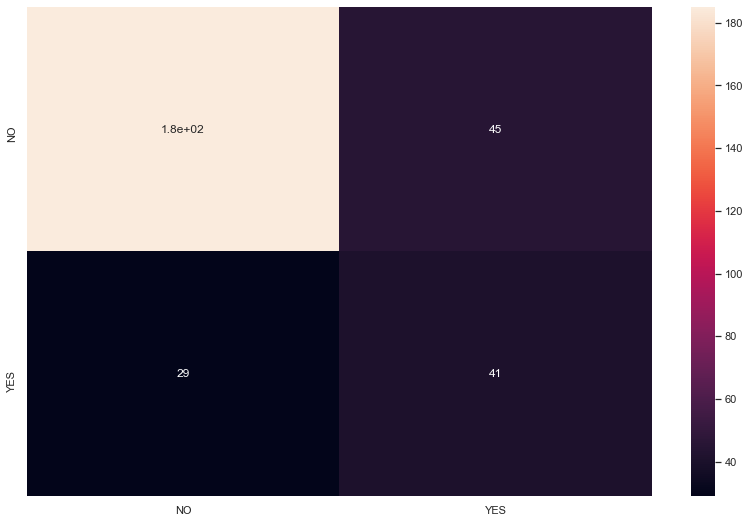

In [86]:
from sklearn .metrics import confusion_matrix
yhat=dcf1.predict(x_test)
sns.heatmap(pd.DataFrame(confusion_matrix(yhat,y_test),columns=[i for i in ['NO','YES']],index=[i for i in ['NO','YES']]),annot=True)